# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>

## IMPORTANT: Guidelines for a proper conduct of the exercises
1. you should create code that is correct, simple, well organized, indented, commented, which uses self-explanatory names for variables and that is numerically efficient.
2. I expect a responsible interaction during the exercises: the questions should be more related to the conduction of the exercises and to the meaning of the results obtained than to the computational problems. Bugs are usual in coding; for this reason, sooner or later, one should learn to deal with them by oneself ... if you'll be able to, it will be your main achievement in this Laboratory!

## <span style="color:blue">  Numerical exercises 1</span>

### Exercise 01.1

- Test the Pseudo-Random Number generator downloaded from the NSL Ariel web site by estimating:

1. $\langle r \rangle = \int_0^1 r dr = 1/2$. <font color="red">Make a picture of the estimation of $\langle r \rangle$ and its uncertainty (which corresponds to Standard Deviation of the mean for the estimation of $\langle r \rangle$) with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font> (see below: Computing statistical uncertainties).

### Uniform sampling:
For this exercise, to evaluate the integral is used an uniform sampling, which means that the distribution function $\rho(x) = 1$ use to sampling is the uniform one:

$$ 
I = \int_0^1 f(x) \, \rho(x) \, dx 
$$

and where $f(x)$ is the function to integrate.
For this exercise, I chose a total of $M = 10^5$ throws and divided them into $N = 100$ blocks to calculate the progressive block averages and progressive error (data blocking), as demonstrated in Computing Statistical Uncertainties. The graphical results are shown below.




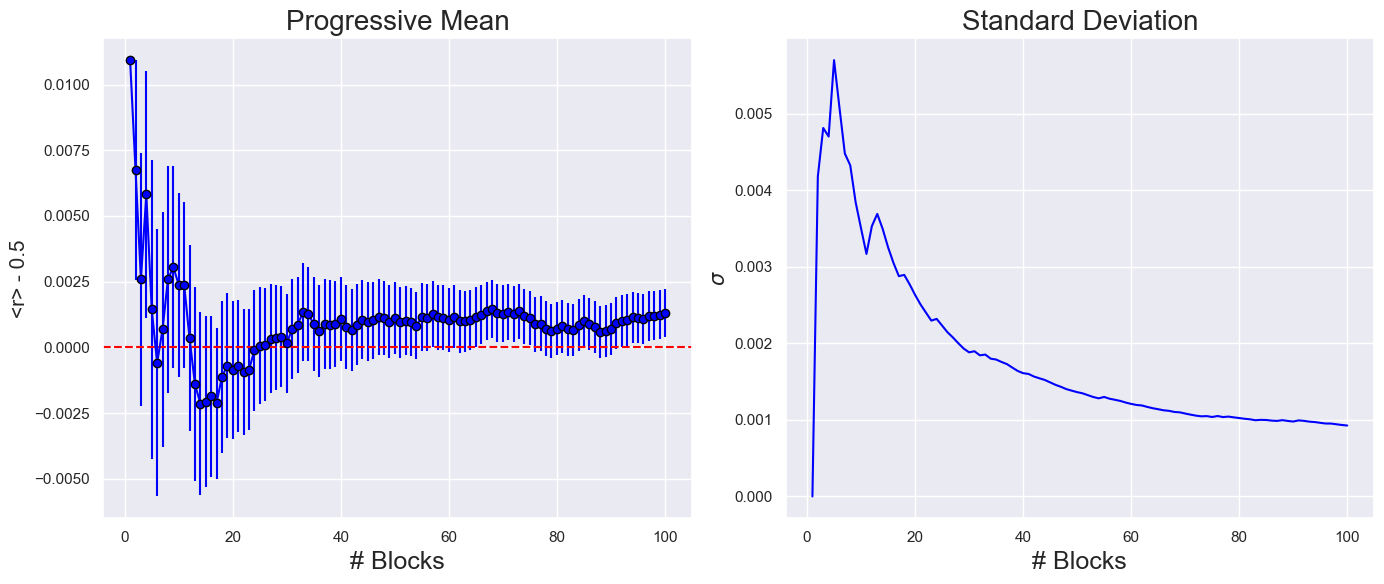

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Set theme to dark grid
sns.set_theme(style='darkgrid')

# Load data from file, skipping the first 2 rows
data = np.loadtxt('Esercizio_1_1/RandomData_dati.txt', usecols=(0, 1, 2, 3), skiprows=2)

# Extract data columns
mean_values = data[:, 0]          # Progressive mean
error_mean = data[:, 1]           # Error in mean
std_dev_values = data[:, 2]       # Progressive standard deviation
error_std_dev = data[:, 3]        # Error in standard deviation

# Create throw counts for x-axis
throws = np.arange(1, len(mean_values) + 1)

# Create figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot progressive mean with error bars
axs[0].errorbar(throws, mean_values - 0.5, yerr=error_mean, marker='o', markeredgecolor='black', linestyle='-', color='blue',ecolor='blue')
axs[0].set_title('Progressive Mean', fontsize=20)
axs[0].set_xlabel('# Blocks', fontsize=18)
axs[0].axhline(y=0, color='red', linestyle='--')
axs[0].set_ylabel('<r> - 0.5', fontsize=15)
axs[0].grid(True)

# Plot error in mean on the second subplot
axs[1].plot(throws, error_mean, marker=' ', linestyle='-', color='blue')
axs[1].set_title('Standard Deviation', fontsize=20)
axs[1].set_xlabel('# Blocks', fontsize=18)
axs[1].set_ylabel(r'$\sigma$', fontsize=15)
axs[1].grid(True)

# Adjust layout and display
plt.tight_layout()
plt.show()




In these two plots, it is possible to observe how the values of the integral converge to the expected values as the number of blocks increases, and how the standard deviation tends to decrease with an increasing number of blocks. The initial values of each plots fluctuate significantly due to data blocking applied only over a small number of blocks. 

2. $\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12$. <font color="red">Make a picture of the estimation of $\sigma^2$ and its uncertainty (which corresponds to Standard Deviation of the mean for the estimation of $\langle (r-1/2)^2 \rangle$) with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font> (see below: Computing statistical uncertainties).

As before, the data consists of $M= 10^5$ throws divided into $N = 100$ blocks. This time, however, block averaging is used to calculate the new integral, based on the progressive uncertainty calculated. The resulting plots are shown below:

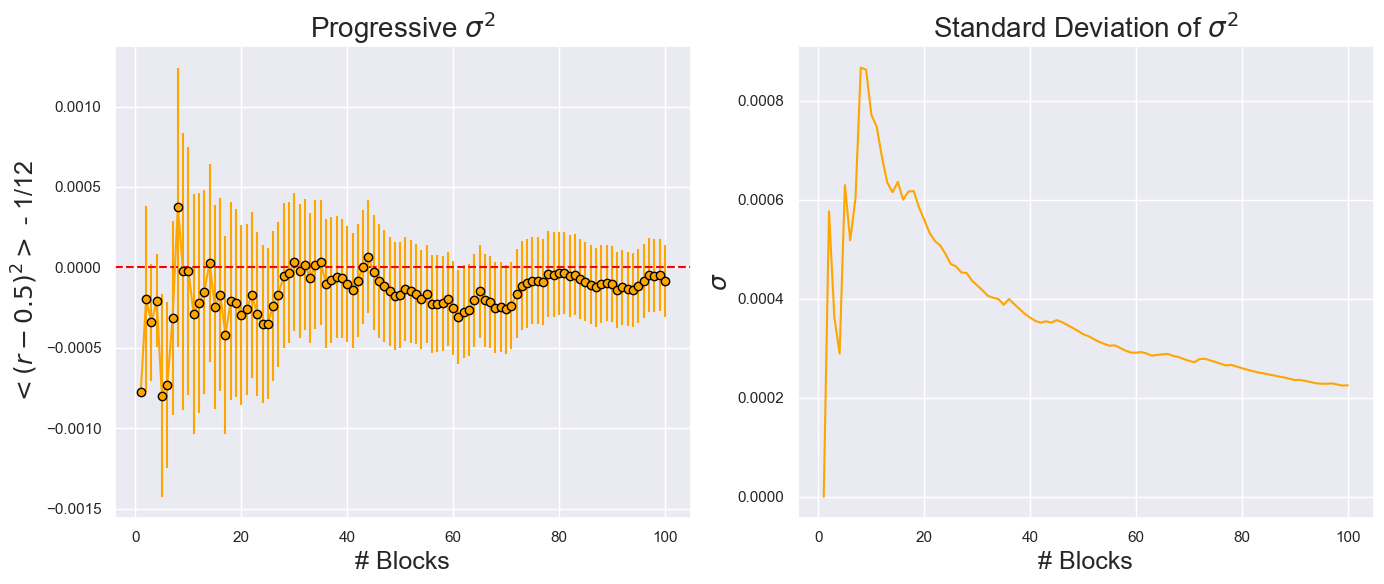

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set_theme(style='darkgrid')

# Load data, skipping the first 2 rows
data = np.loadtxt('Esercizio_1_1/RandomData_dati.txt', usecols=(0, 1, 2, 3), skiprows=2)

# Extract standard deviation and error values
std_dev_values = data[:, 2]       # Progressive standard deviation
error_std_dev = data[:, 3]        # Error in standard deviation

# Generate throw counts for x-axis
throws = np.arange(1, len(std_dev_values) + 1)

# Create figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot standard deviation with error bars
axs[0].errorbar(throws, std_dev_values - 1/12, yerr=error_std_dev, marker='o', markeredgecolor='black', linestyle='-', color='orange')
axs[0].set_title('Progressive $\sigma^2$', fontsize=20)
axs[0].set_xlabel('# Blocks', fontsize=18)
axs[0].axhline(y=0, color='red', linestyle='--')
axs[0].set_ylabel(r'$<(r-0.5)^2>$ - 1/12', fontsize=18)
axs[0].grid(True)

# Plot error in standard deviation
axs[1].plot(throws, error_std_dev, marker=' ', linestyle='-', color='orange')
axs[1].set_title(r'Standard Deviation of $\sigma^2$', fontsize=20)
axs[1].set_xlabel('# Blocks', fontsize=18)
axs[1].set_ylabel(r'$\sigma$', fontsize=18)
axs[1].grid(True)

# Adjust layout and display
plt.tight_layout()
plt.show()


In these two plots, it is possible to observe how the values of the integral converge to the expected values as the number of blocks increases, and how the standard deviation tends to decrease with an increasing number of blocks. As before, the initial values fluctuate significantly because the block averaging is only progressively applied over a small number of blocks.

### Verify (or not) uniform drawing:
The hypothesis is that the numbers $r$ are drawn from a uniform distribution. In Statistics we cannot prove that some random events are drawn from a particular distribution (Note, in fact, that such hypothesis is false: pseudo-random numbers are drawn from a deterministic algorithm!); we can try to estimate the probability that $r$ **are not** drawn from a uniform distribution. If this probability is low, we can safely reject this last hypothesis.
<p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5">
Pearson's cumulative test statistic $\chi^2$ is a measure of the error between observations, $O_i$, and expected values, $E_i$:
$$\chi^2 = \sum_{i} \frac{\left( O_i - E_i \right)^2}{E_i}$$
The numerator is a squared distance between observations, $O_i$, and expected values, $E_i$, and thus should be compared (at the denominator) with the expected squared fluctuations (variance) of the relative distribution. Why variance = $E_i$? 
The probability of getting exactly $k$ (independent) successes, each one with probability $p$, in $n$ trials is given by the Binomial distribution (see <a href="https://en.wikipedia.org/wiki/Binomial_distribution">this Wikipedia link</a>):
$$Pr(X=k) = {{n}\choose{k}} p^k (1-p)^{n-k} = \frac{n!}{k! (n-k)!} p^k (1-p)^{n-k}$$
The average of the Binomial distribution is $\langle X \rangle = np$, the variance is: $\sigma^2 = np (1-p)$. Thus if $p$ is small we have that $\sigma^2 \simeq np$, that is $\sigma^2 \simeq \langle X \rangle$ and this explains the denominator $E_i$ in $\chi^2$
</p>



3. Divide $[0,1]$ into $M$ identical sub-intervals and implement the $\chi^2$ test. Obviously, the number of expected events observed in each sub-interval after $n$ *throws*, according to a uniform distribution, is $np = n\times 1/M= n/M$. Fix $M=10^2$ and use for $n$ the first $10^4$ pseudo-random numbers, then the successive $10^4$ pseudo-random numbers, and so on ... 100 times. <font color="red">Plot $\chi^2_j$ for $j=1, ..., 100$</font>. In this case the chi-square statistic is:
$$\chi^2 = \sum_{i=1}^M \frac{\left( n_i - n/M \right)^2}{n/M}$$
We should expect on average that $(n_i - n/M)^2 \simeq n/M$ and thus $\chi^2 \simeq 100$, i.e. the number of sub-intervals.
A larger value of $\chi^2$ indicates that the hypothesis ($n_i$ are drawn from a uniform distribution) is rather unlikely ... <font color="red">but before judging</font>, you could compare the histogram of the values obtained for $\chi^2_j$ with the true probability distribution (see: <a href="https://en.wikipedia.org/wiki/Chi-squared_distribution">this Wikipedia link</a>).

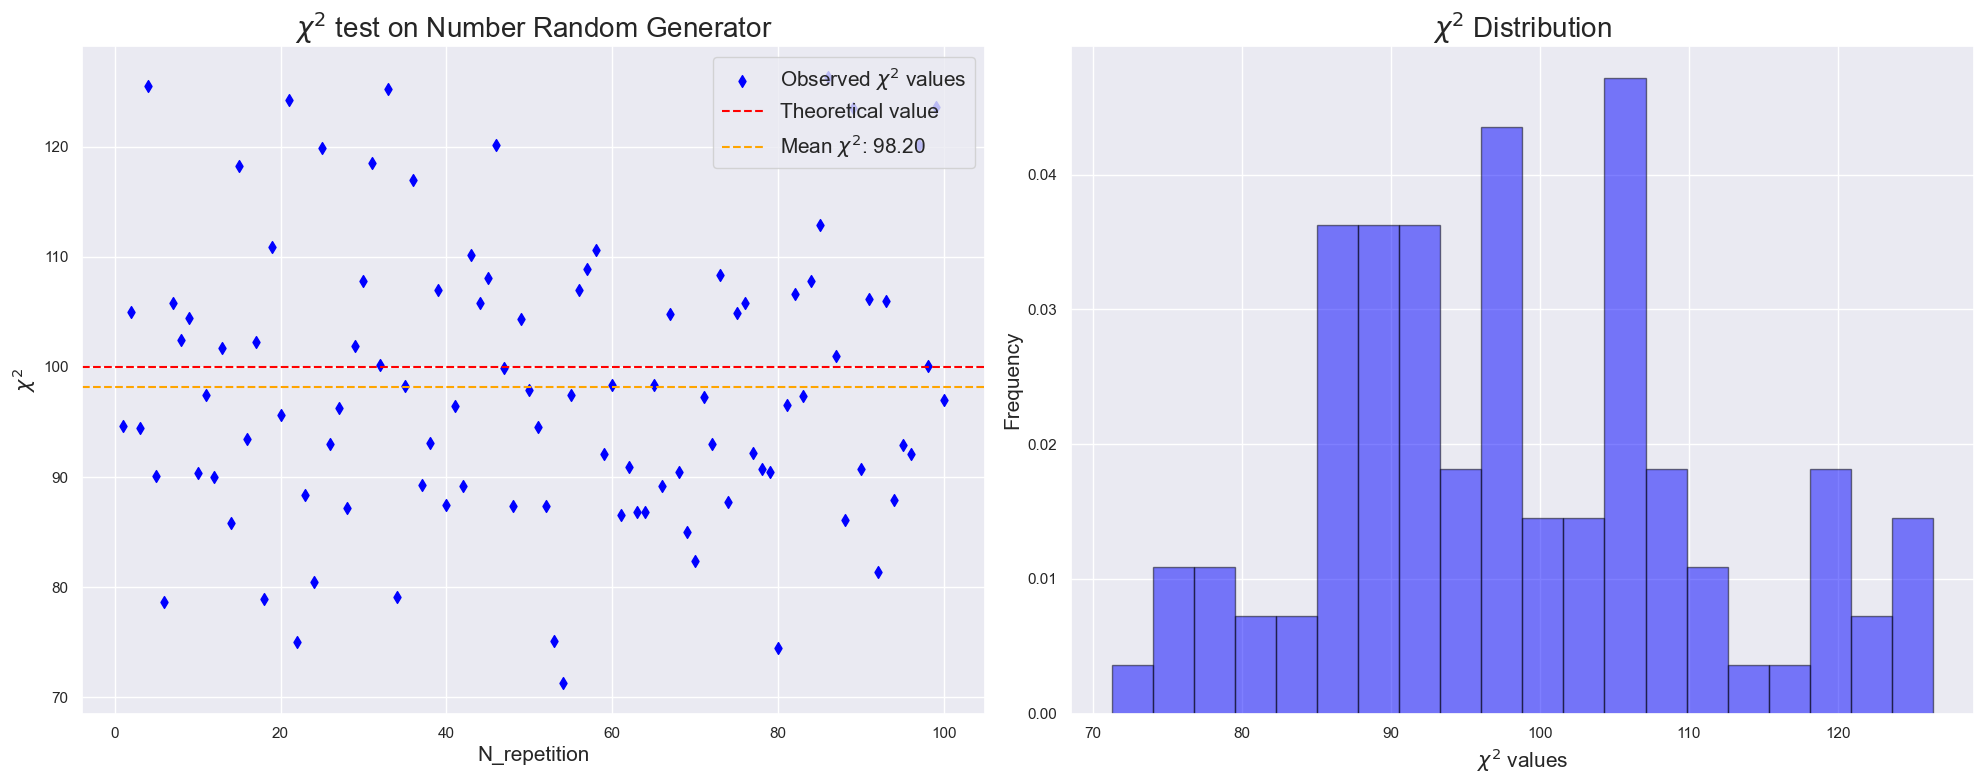

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Load data from file 'Esercizio_1_1/TestChi2.txt'
data = np.loadtxt('Esercizio_1_1/TestChi2_ex.txt', usecols=(0))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))  # Create 1x2 grid of subplots

# Scatter plot for Chi^2 test
test = data[:]
ripetizione = np.arange(1, len(test) + 1)
mean_value = np.mean(test)  # Calculate mean of the Chi^2 values

ax1.set_title(r'$\chi^2$ test on Number Random Generator', fontsize=20)
ax1.scatter(ripetizione, test, marker="d", color='blue', label='Observed $\chi^2$ values')
ax1.axhline(100, ls='--', c='red', label='Theoretical value')
ax1.axhline(mean_value, ls='--', c='orange', label=f'Mean $\chi^2$: {mean_value:.2f}')  # Add mean line
ax1.grid(True)
ax1.set_xlabel("N_repetition", fontsize=15)
ax1.set_ylabel(r'$\chi^2$', fontsize=15)
ax1.legend(loc='upper right',fontsize =15)

# Histogram for data distribution
ax2.set_title(r'$\chi^2$ Distribution', fontsize=20)
ax2.hist(data, bins=20, color='blue', edgecolor='black', density=True, alpha=0.5)


ax2.set_xlabel(r'$\chi^2$ values', fontsize=15)
ax2.set_ylabel('Frequency', fontsize=15)
ax2.grid(True)

plt.tight_layout()
plt.show()


In these graphs, the $\chi^2$ function of the random generator is represented to verify its functionality. It can be observed that the observed value, represented by the orange line, is close to the expected value,red line, with a delta of $1.2$ in the first plot. In next paragraph there is an improvment to understand better.

#### Little improvment:

To optimize the fluctuations in the results, one approach could be to increase the number of measurements to see if the distribution of the graph indeed tends toward the expected value. Below the same plot obtained with a number of ripetition `4000`. 

To verify the compatibility of the result, a fit was performed between the histogram and the chi-square function, shown in Wikipedia links given by exercise, which has an expected value of $\langle \chi^2 \rangle = M-1$, where $M-1$ represents the system’s degrees of freedom. Scipy methods were used to assess this compatibility, measuring the p-value. A p-value below the 5% threshold would imply a lack of compatibility within the system.


Chi-square statistic: 0.01
P-value: 1.0000


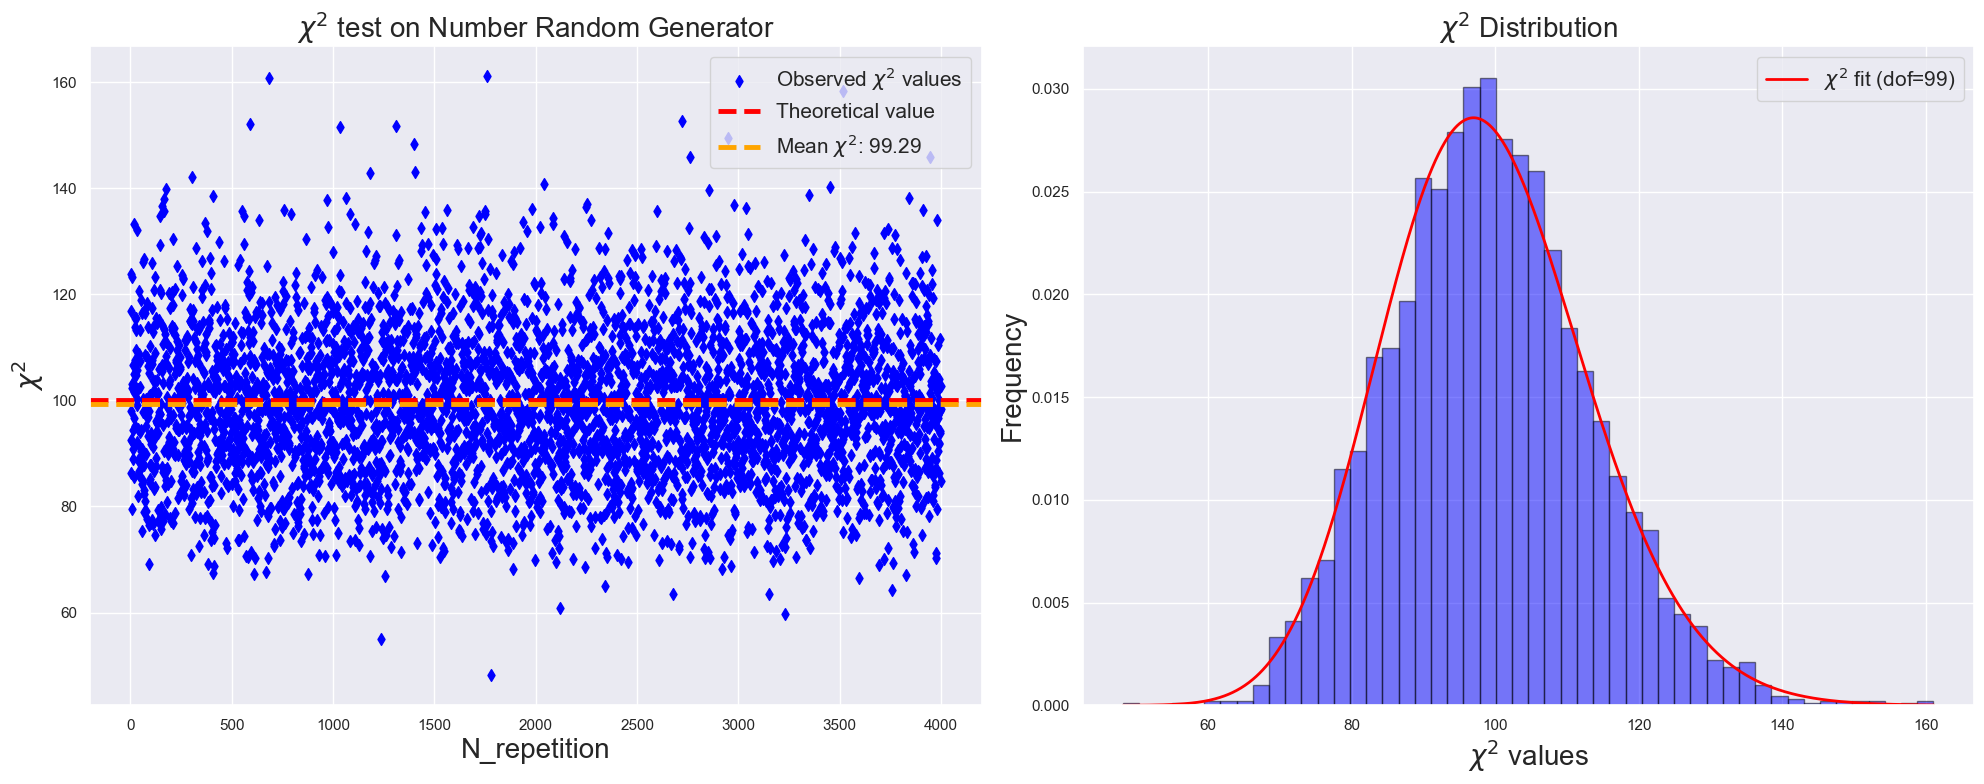

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2

# Load data from file 'Esercizio_1_1/TestChi2.txt'
data = np.loadtxt('Esercizio_1_1/TestChi2.txt', usecols=(0))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))  # Create 1x2 grid of subplots

# Scatter plot for Chi^2 test
test = data[:]
ripetizione = np.arange(1, len(test) + 1)
mean_value = np.mean(test)  # Calculate mean of the Chi^2 values

ax1.set_title(r'$\chi^2$ test on Number Random Generator', fontsize=20)
ax1.scatter(ripetizione, test, marker="d", color='blue', label='Observed $\chi^2$ values')
ax1.axhline(100, ls='--', lw=3.5, c='red', label='Theoretical value')
ax1.axhline(mean_value, ls='--', lw=3.5, c='orange', label=f'Mean $\chi^2$: {mean_value:.2f}')  # Add mean line
ax1.grid(True)
ax1.set_xlabel("N_repetition", fontsize=20)
ax1.set_ylabel(r'$\chi^2$', fontsize=20)
ax1.legend(loc='upper right', fontsize=15)

# Histogram for data distribution with chi-square fit
ax2.set_title(r'$\chi^2$ Distribution', fontsize=20)
count, bins, _ = ax2.hist(data, bins=50, color='blue', edgecolor='black', density=True, alpha=0.5)

# Fit chi-square distribution
df = 99  # Degrees of freedom
x = np.linspace(bins[0], bins[-1], 1000)  # Points for the fit line
chi2_fit = chi2.pdf(x, df)  # Chi-square PDF

# Plot the chi-square fit
ax2.plot(x, chi2_fit, color='red', linewidth=2, label=r'$\chi^2$ fit (dof=99)')
ax2.set_xlabel(r'$\chi^2$ values', fontsize=20)
ax2.set_ylabel('Frequency', fontsize=20)
ax2.legend(fontsize=15)
ax2.grid(True)

# Goodness-of-fit test
observed_counts, _ = np.histogram(data, bins=bins, density=True)
expected_counts = chi2.pdf(bins[:-1] + np.diff(bins) / 2, df)  # Expected counts based on chi2 PDF
expected_counts *= np.sum(observed_counts) * np.diff(bins)  # Scale expected counts to observed data

# Calculate chi-square statistic
chi_square_stat = np.sum(((observed_counts - expected_counts) ** 2) / expected_counts)
p_value = chi2.sf(chi_square_stat, df=len(observed_counts) - 1)

# Show chi-square test result
print(f"Chi-square statistic: {chi_square_stat:.2f}")
print(f"P-value: {p_value:.4f}")

plt.tight_layout()
plt.show()


Increasing the number of repetitions causes the graph to approach the expected value of 99. A p-value of 1.0000 was obtained, indicating an excellent fit with the expected chi-square distribution, so it is safe to reject to estimate the probability that $r$ **are not** drawn from a uniform distribution

### Exercise 01.2
Extend the pseudo-random number generator downloaded from the NSL Ariel website to verify the Central Limit Theorem. The Central Limit Theorem states that, for a sufficiently large sample taken from a population with finite variance, the distribution of the sample mean tends to approximate a normal distribution, regardless of the original distribution of the population. In other words, as the sample size increases, the distribution of the sample mean converges more closely to a normal distribution. Additionally, the sample mean tends toward the population mean, and the standard deviation of the sample mean approaches the population standard deviation divided by the square root of the sample size $\frac{\sigma}{\sqrt(N)}$

1. <font color="red">Add two probability distributions</font> by using the **method of the inversion of the cumulative distribution** to sample from a **generic** <font color="red">exponential distribution</font>, $p(x) = \lambda \exp(-\lambda x)$, $x\in [0;+\infty]$ (see <a href="https://en.wikipedia.org/wiki/Exponential_distribution">this Wikipedia link</a>), and a **generic** <font color="red">Cauchy-Lorentz distribution</font> $p(x)=\frac{1}{\pi}\frac{\Gamma}{(x-\mu)^2+\Gamma^2}$, $x\in [-\infty;+\infty]$ (see <a href="https://en.wikipedia.org/wiki/Cauchy_distribution">this Wikipedia link</a>).

### Method of the inversion of the cumulative distribution:

The method of inversion of cumulative distribution is a technique used to generate random samples from a given cumulative distribution function (CDF). It relies on the property that if U is a uniform random variable on the interval  [0, 1] , and  F^{-1}  is the inverse of the CDF of a desired distribution, then  X = F^{-1}(U)  will have the desired distribution.
The value  X will then follow the distribution with cumulative function  F(x).

#### Example:

In this exercise it is requested to use this method to an exponential distribution and to a Lorentz-Cauchy distribution:
Here are set two pices of code belonging to `Esercizio_1_2` in `Random.h` class, where are represented the application of inversion of cumulative distribution

```cpp
    double Random :: Cauchy_Lorentz(double mean, double sigma){
        // This function generates a random number from a Cauchy-Lorentz distribution with given mean and sigma
    
        double s = Rannyu();
        double x = tan(M_PI*(s-0.5));
        return mean + x * sigma;
    }

    double Random :: Exp_distribution(double mean){
        // This function generates a random number from a exponential distribution with given mean and sigma
    
        double s = Rannyu();
        double x = log(1-s);
    
        return ((-1)/mean)*x;
    
    }
```
Here, we present two algorithms that allow us to sample from these distributions. Below, we display the different distributions: uniform, exponential, and Cauchy-Lorentz. We sum the variables to verify the model of the Central Limit Theorem with these feature:

2. <font color="red">Make 3 pictures</font> with the histograms obtained filling them with $10^4$ realizations of $S_N = \frac{1}{N}\sum_{i=1}^N x_i$ (for $N=1, 2, 10, 100$), being $x_i$ a random variable sampled throwing a *standard* dice (fig.1), an *exponential* dice (fig.2, use $\lambda=1$) and a *Lorentzian* dice (fig.3, use $\mu=0$ and $\Gamma=1$).

Note tha you can try to fit the case $N=100$ with a Gaussian for standard and exponential dices, whereas you should use a Cauchy-Lorentz distribution for the last case.



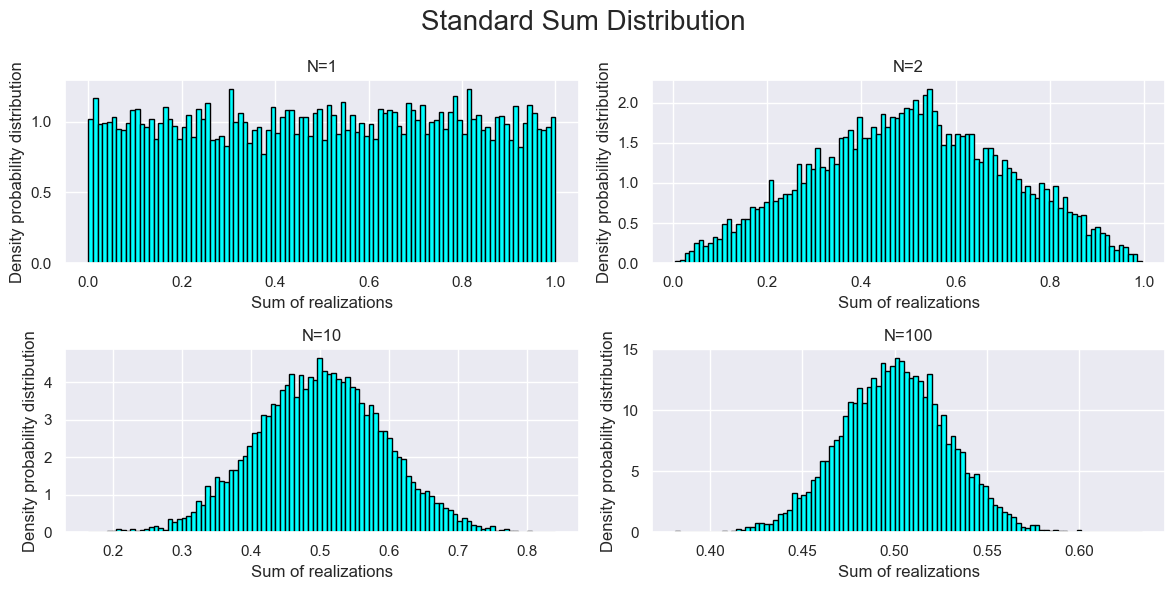

In [8]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math 
import seaborn as sns
sns.set_theme(style='darkgrid')

data_lin1,data_lin2,data_lin10, data_lin100 = np.loadtxt('Esercizio_1_2/Dati_lineare.txt');

fig=plt.figure(figsize=(12, 6))
fig.suptitle("Standard Sum Distribution", fontsize= 20)

ax = plt.subplot(2, 2, 1)

plt.hist(data_lin1, bins=100, edgecolor='black',color = "aqua", density = True)  
plt.xlabel('Sum of realizations')
plt.ylabel('Density probability distribution')
plt.title('N=1')
plt.grid(True)

ax = plt.subplot(2, 2, 2)

plt.hist(data_lin2, bins=100, edgecolor='black',color = "aqua",density = True)  
plt.xlabel('Sum of realizations')
plt.ylabel('Density probability distribution')
plt.title('N=2')
plt.grid(True)

ax = plt.subplot(2, 2, 3)
plt.hist(data_lin10, bins=100, edgecolor='black',color = "aqua",density = True) 
plt.xlabel('Sum of realizations')
plt.ylabel('Density probability distribution')
plt.title('N=10')
plt.grid(True)

ax = plt.subplot(2, 2, 4)
plt.hist(data_lin100, bins=100, edgecolor='black',color = "aqua",density = True)  
plt.xlabel('Sum of realizations')
plt.ylabel('Density probability distribution')
plt.title('N=100')
plt.grid(True)

fig.tight_layout()
plt.show()


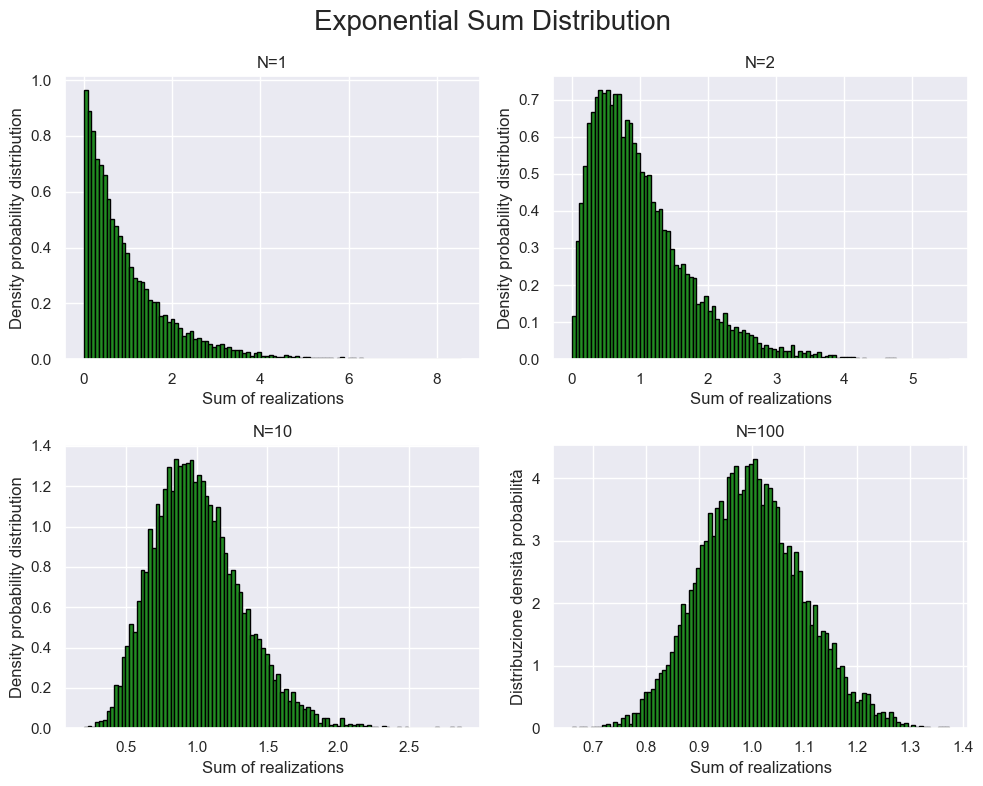

In [10]:
data_exp1,data_exp2,data_exp3, data_exp4 = np.loadtxt('Esercizio_1_2/Dati_esponenziali.txt');

fig=plt.figure(figsize=(10, 8))
fig.suptitle('Exponential Sum Distribution', fontsize= 20)

ax = plt.subplot(2, 2, 1)

plt.hist(data_exp1, bins=100, edgecolor='black',color = "forestgreen",density = True)  
plt.xlabel('Sum of realizations')
plt.ylabel('Density probability distribution')
plt.title('N=1')
plt.grid(True)

ax = plt.subplot(2, 2, 2)

plt.hist(data_exp2, bins=100, edgecolor='black',color = "forestgreen",density = True)  
plt.xlabel('Sum of realizations')
plt.ylabel('Density probability distribution')
plt.title('N=2')
plt.grid(True)

ax = plt.subplot(2, 2, 3)
plt.hist(data_exp3, bins=100 ,edgecolor='black',color = "forestgreen",density = True) 
plt.xlabel('Sum of realizations')
plt.ylabel('Density probability distribution')
plt.title('N=10')
plt.grid(True)

ax = plt.subplot(2, 2, 4)
plt.hist(data_exp4, bins=100, edgecolor='black',color = "forestgreen",density = True)  
plt.xlabel('Sum of realizations')
plt.ylabel('Distribuzione densità probabilità')
plt.title('N=100')
plt.grid(True)

fig.tight_layout()
plt.show()

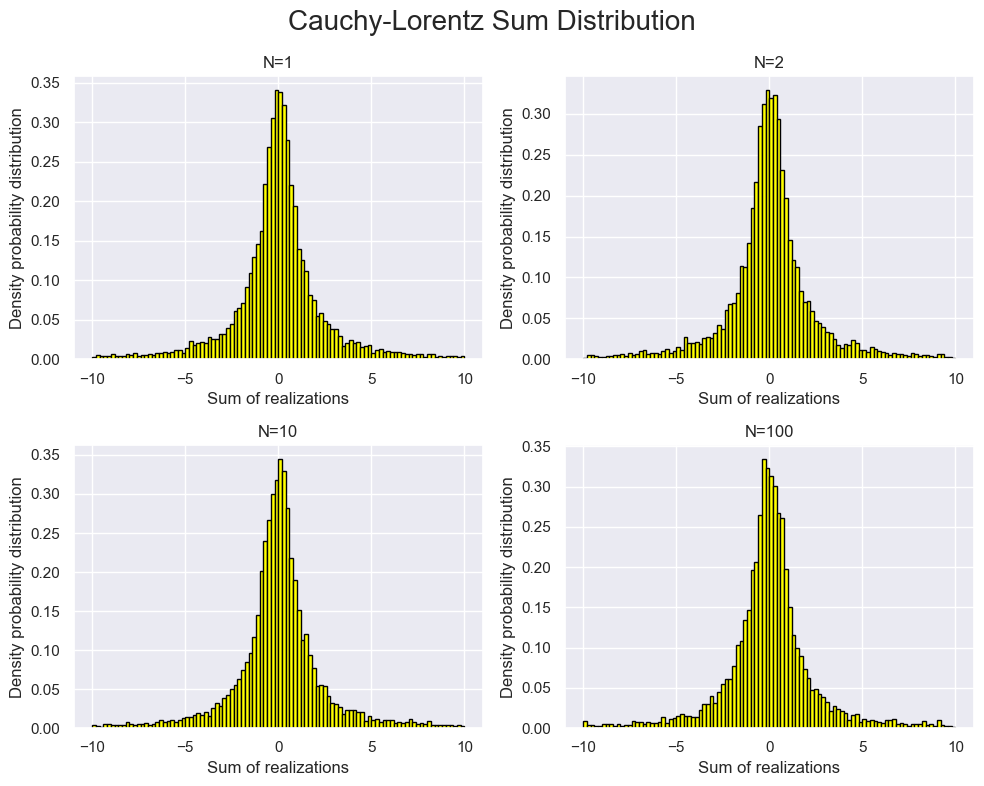

In [12]:
data_lor1,data_lor2,data_lor3, data_lor4 = np.loadtxt('Esercizio_1_2/Dati_lorentziana.txt');

fig=plt.figure(figsize=(10, 8))
fig.suptitle('Cauchy-Lorentz Sum Distribution', fontsize= 20)

ax = plt.subplot(2, 2, 1)

plt.hist(data_lor1, bins=100, range = (-10,10),edgecolor='black',color = "yellow",density=True)  
plt.xlabel('Sum of realizations')
plt.ylabel('Density probability distribution')
plt.title('N=1')
plt.grid(True)

ax = plt.subplot(2, 2, 2)

plt.hist(data_lor2, bins=100, range = (-10,10),edgecolor='black',color = "yellow",density=True)  
plt.xlabel('Sum of realizations')
plt.ylabel('Density probability distribution')
plt.title('N=2')
plt.grid(True)

ax = plt.subplot(2, 2, 3)
plt.hist(data_lor3, bins=100 ,range = (-10,10),edgecolor='black',color = "yellow",density=True) 
plt.xlabel('Sum of realizations')
plt.ylabel('Density probability distribution')
plt.title('N=10')
plt.grid(True)

ax = plt.subplot(2, 2, 4)
plt.hist(data_lor4, bins=100,range = (-10,10), edgecolor='black',color = "yellow",density=True)  
plt.xlabel('Sum of realizations')
plt.ylabel('Density probability distribution')
plt.title('N=100')
plt.grid(True)

fig.tight_layout()
plt.show()

In these graphs, we can see how, initially, both the uniform and exponential distributions visually tend to stabilize around a curve that should be verified as Gaussian. In contrast, the Cauchy distribution remains unchanged. This occurs because the Cauchy-Lorentz distribution does not satisfy the necessary conditions for the validity of the Central Limit Theorem, as it possesses an infinite variance.

Now, we aim to verify the Central Limit Theorem by fitting a potential Gaussian model using `SciPy`, a Python library, to assess the validity of the theorem. Meanwhile, the Cauchy-Lorentz distribution will be fitted with a Lorentzian model.



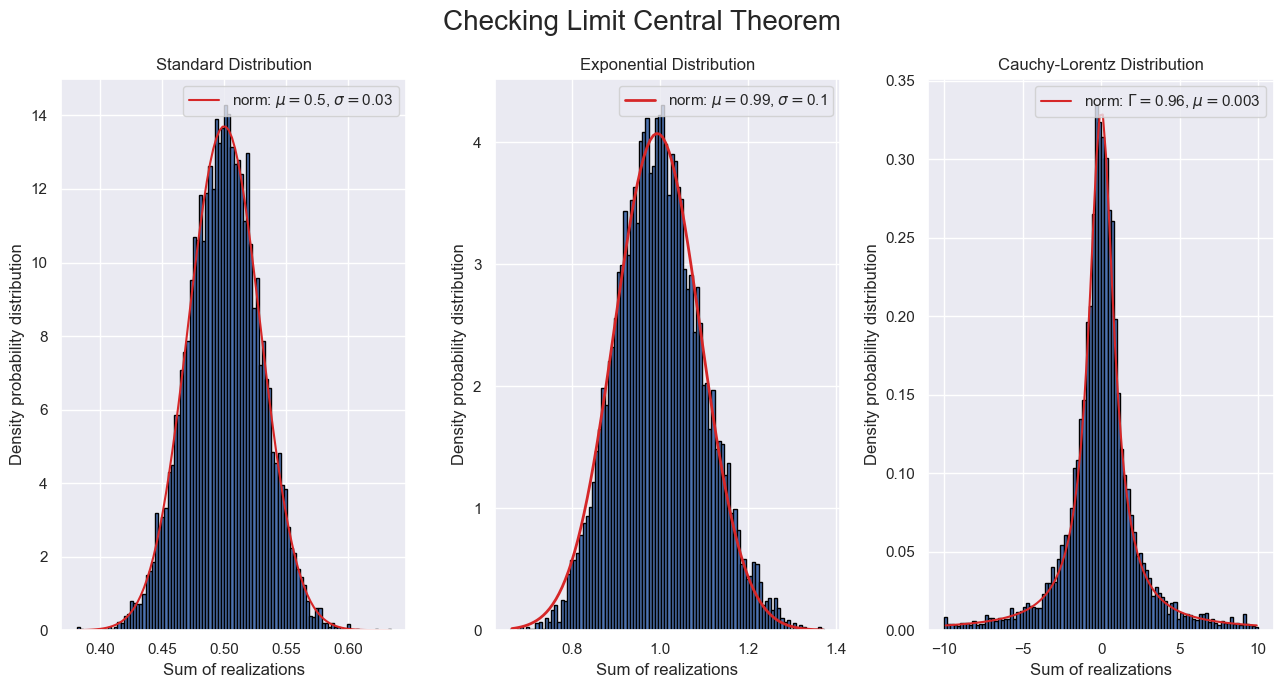

In [14]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math 
from scipy.stats import norm, cauchy
from scipy.optimize import curve_fit

def fit_gaussian (x,mu,sigma):
    return norm.pdf(x, mu, sigma)

def fit_cauchy(x, gamma, x0):
    return cauchy.pdf(x, x0, gamma)

data_lor = np.loadtxt('Esercizio_1_2/Dati_lorentziana.txt');
lor = data_lor[3]
data_exp = np.loadtxt('Esercizio_1_2/Dati_esponenziali.txt');
exp = data_exp[3]
data_lin = np.loadtxt('Esercizio_1_2/Dati_lineare.txt')
lin = data_lin[3]

fig=plt.figure(figsize=(13, 7))
fig.suptitle('Checking Limit Central Theorem', fontsize=20)

ax = plt.subplot(1, 3, 1)
plt.hist(lin, bins=100, edgecolor='black',density=True)  
plt.xlabel('Sum of realizations')
plt.ylabel('Density probability distribution')
plt.title('Standard Distribution')


ax = plt.subplot(1, 3, 2)
plt.hist(exp, bins=100, edgecolor='black',density=True)  
plt.xlabel('Sum of realizations')
plt.ylabel('Density probability distribution')
plt.title('Exponential Distribution')


ax = plt.subplot(1, 3, 3)
plt.hist(lor, bins=100, range = (-10,10), edgecolor='black',density=True)
plt.xlabel('Sum of realizations')
plt.ylabel('Density probability distribution')
plt.title('Cauchy-Lorentz Distribution')

#Fit delle distribuzioni
hist, bins = np.histogram(lin, bins=100, density=True)
x_lin = bins[:-1] + np.diff(bins) / 2
popt_lin, pcov_lin = curve_fit(fit_gaussian, x_lin, hist)

hist, bins = np.histogram(exp, bins=100, density=True)
x_exp = bins[:-1] + np.diff(bins) / 2
popt_exp, pcov_exp = curve_fit(fit_gaussian, x_exp, hist)

hist, bins = np.histogram(lor, bins=100, range=(-10,10), density=True)
x_lor = bins[:-1] + np.diff(bins) / 2
popt_lor, pcov_lor = curve_fit(fit_cauchy, x_lor, hist)


ax = plt.subplot(1, 3, 1)
plt.plot(x_lin, fit_gaussian(x_lin, *popt_lin), color='tab:red', label=f'norm: $\mu=${round(popt_lin[0],2)}, $\sigma=${round(popt_lin[1],2)}'   )
plt.legend()
plt.grid(True)

ax = plt.subplot(1, 3, 2)
plt.plot(x_exp, fit_gaussian(x_exp, *popt_exp), color='tab:red', lw=2, label=f'norm: $\mu=${round(popt_exp[0],2)}, $\sigma=${round(popt_exp[1],2)}')
plt.legend()
plt.grid(True)


ax = plt.subplot(1, 3, 3)
plt.plot(x_lor, fit_cauchy(x_lor, *popt_lor), color='tab:red',label=f'norm: $\Gamma =${round(popt_lor[0],3)}, $\mu=${round(popt_lor[1],3)}')
plt.legend()
plt.grid(True)

fig.tight_layout()
plt.show()




In these latest graphs, we can see how the histograms have been fitted with Gaussian and Cauchy-Lorentz curves. The parameters corresponding to the curves for each distribution required by the exercise have been found.

### Exercise 01.3
- **Simulate** the Buffon’s experiment (see LSN_Lecture_00, supplementary material):  A needle of length $L$ is thrown at random onto a horizontal plane ruled with straight lines a distance $d$ (must be $d > L$, but do not use $d\gg L$ otherwise $P\ll 1$) apart. The probability $P$ that the needle will intersect one of these lines is: $P = 2L/\pi d$. This could be used to evaluate $\pi$ from throws of the needle: if the needle is thrown down $N_{thr}$ times and is observed to land on a line $N_{hit}$ of those times, we can make an estimate of $\pi$ from
$$\pi = \frac{2L}{Pd} = \lim_{N_{thr} \to \infty}\frac{2LN_{thr}}{N_{hit}d}$$
<font color="red">Make a picture of the estimation of $\pi$ and its uncertainty (Standard Deviation of the mean) with a large number of *throws* $M$ as a function of the number of blocks, $N$</font> (see below: Computing statistical uncertainties). If possible, do not use $\pi$ to evaluate $\pi$.

## Resolution

The key point of the problem is that the needle will intersect the line if the projection of its center on the perpendicular axis between the lines is less than half the distance $\frac{d}{2} $ between the two lines:

$$
\frac{L}{2} \cdot \sin(\theta) \leq \frac{d}{2}
$$

where $\theta$ is the angle in the interval $[0, \frac{\pi}{2}]$ between the line and the needle.

After setting all the parameters, in this case, with the needle length `L = 1` and the distance between lines  `d = 1.5`, it is important to understand how to generate the angle $\theta $ using the `random_generator`.

### Angle Generator

To simulate this exercise, different aspects need to be considered. Since there is the request to avoid using the value of $ \pi $, it is important to understand how to generate angles uniformly in the interval $ [0, \frac{\pi}{2}] $.

For this reason, a method is found to generate the angle using the unit circle. In particular, by calculating $ \tan^{-1}\left(\frac{x}{y}\right) $ for two numbers  x, y belonging to the interval $[0, 1]$, uniformly generated, and ensuring that the norm $ \sqrt{x^2 + y^2} $ is inside the circle, it is possible to map uniformly within the circle rather than in a square, which create a non uniform distribution of generated angle. This allows for the creation of angles uniformly distributed in the requested interval.


### Code:

For this reason the code takes in count these requests. Here, there is the main part of the code:


```cpp
  for (int i = 0; i < L; i++) {
            // Generate random coordinates within the unit circle
            do {
                x = rnd.Rannyu(); 
                y = rnd.Rannyu(); 
            } while (sqrt(x * x + y * y) > 1);

            theta << atan(x / y) << endl;

            // Randomly generate distance
            d = rnd.Rannyu() * dist_lines;
            if ((d + (ago / 2.) * sin(atan(x / y)) >= dist_lines) ||     \\it's important to consider the two case of intersection
                (d - (ago / 2.) * sin(atan(x / y)) <= 0)) {     
                counter++;
            }
        }
```
Where `d` is the distance between line and `ago`is the lenght of the needle.
Below there is the plot of the values of $\pi$ obtained from mean block method and the evolution of its error.
The plot is obtained within $10^5$ `throws` and setting $100$ `blocks`:

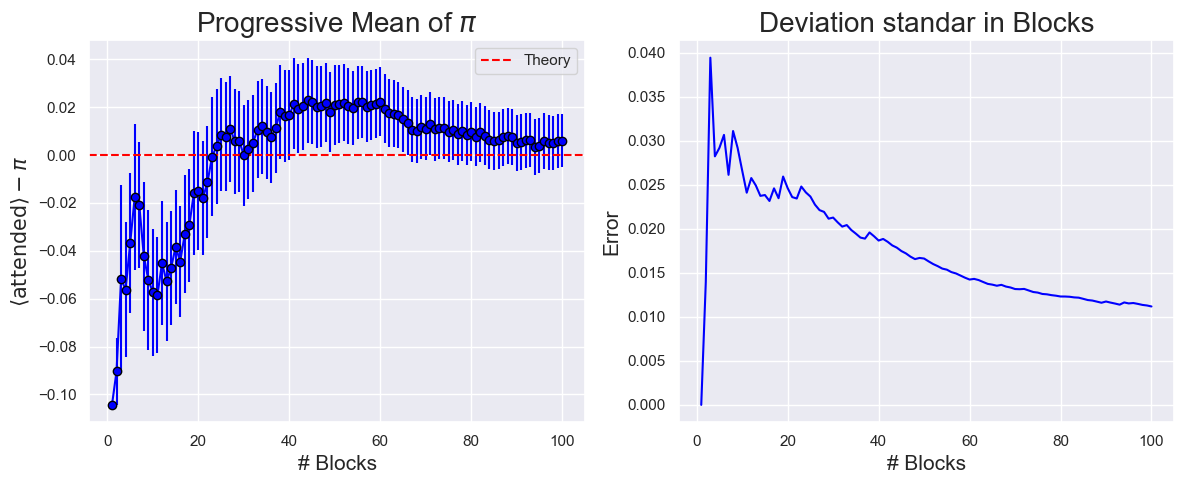

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Load data from file 'Esercizio_1_3/Valori_pi.txt', using columns 0 and 1
data = np.loadtxt('Esercizio_1_3/Valori_pi.txt', usecols=(0, 1))

# Lists to store the data
media_pi = data[:, 0]
errore_media_pi = data[:, 1]

# Create an array for the number of throws (1, 2, ..., L)
lanci = np.arange(1, len(media_pi) + 1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))  

# First subplot: Progressive Mean of pi
ax1.errorbar(lanci, media_pi - np.pi, yerr=errore_media_pi, marker='o', linestyle='-',color='blue', markeredgecolor='black')
ax1.set_title(r'Progressive Mean of $\pi$', fontsize=20)
ax1.set_xlabel('# Blocks', fontsize=15)
ax1.set_ylabel(r'$\langle \text{attended} \rangle - \pi$', fontsize=15)
ax1.axhline(0, ls='--', c='red', label='Theory')
ax1.grid(True)
ax1.legend()

# Second subplot: Error vs Blocks
# Here you can calculate the block sizes. For example, if you take the first n blocks of your data.
# Assuming each entry in media_pi corresponds to a block average, we can simply plot the error as a function of the block number.
# For this example, we'll just use `lanci` as the number of blocks.

ax2.plot(lanci, errore_media_pi, linestyle='-', color='blue')
ax2.set_title(r'Deviation standar in Blocks', fontsize=20)
ax2.set_xlabel('# Blocks', fontsize=15)
ax2.set_ylabel('Error', fontsize=15)
ax2.grid(True)

# Adjust layout
fig.tight_layout()
plt.show()


Here is possible to see how the code converge to the value of $\pi$ requested, increasing the number of blocks, and the progressive error decay increasing the number of blocks

### Checking uniform generation angle
Below is put a plot of the distribution of the angle generated by the code, paying attention to the difference between angle inside the unit circle or the square one.

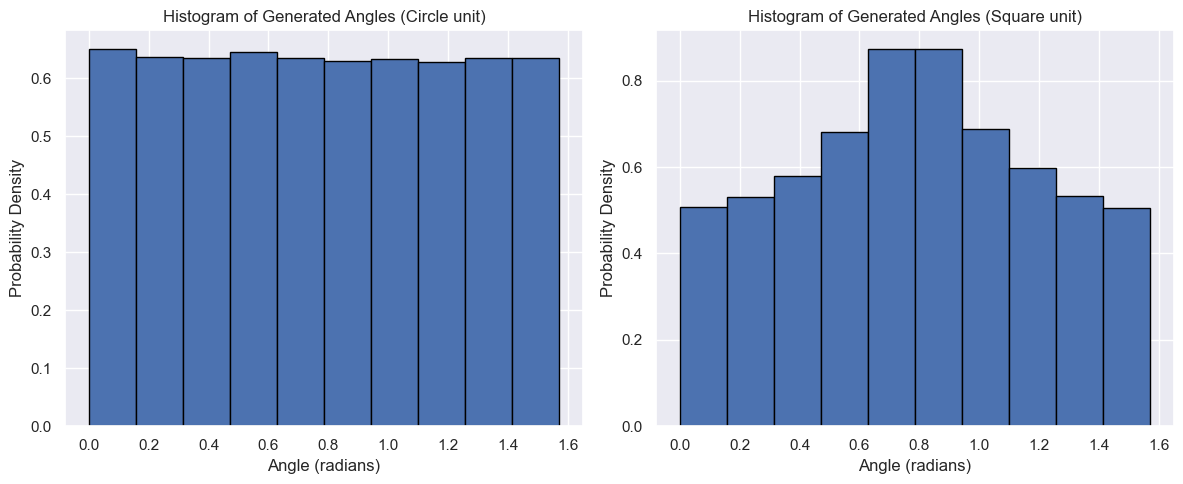

In [47]:
import matplotlib.pyplot as plt
import numpy as np

# Load data from files
data_true = np.loadtxt('Esercizio_1_3/theta_check_true.txt')
data_check = np.loadtxt('Esercizio_1_3/theta_check_square.txt')

# Assuming theta is the first column
theta_true = data_true  # If there are multiple columns, use data[:, col_index] to select the correct one
theta_check = data_check  # Same for the second dataset

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# Create the first histogram
axs[0].hist(theta_true, bins=10, range=(0, np.pi/2), edgecolor='black', density=True)
axs[0].set_xlabel('Angle (radians)')
axs[0].set_ylabel('Probability Density')
axs[0].set_title('Histogram of Generated Angles (Circle unit)')

# Create the second histogram
axs[1].hist(theta_check, bins=10, range=(0, np.pi/2), edgecolor='black', density=True)
axs[1].set_xlabel('Angle (radians)')
axs[1].set_ylabel('Probability Density')
axs[1].set_title('Histogram of Generated Angles (Square unit)')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


By examining the first histogram,it is possible to verify the uniformity of the distribution of the angles generated in the interval 
$[0,\frac{\pi}{2}]$, while the second histogram does not show uniformity,and there pick around the angle $\frac{\pi}{4}$ as expected in a unit square.

### <span style="color:blue">Computing statistical uncertainties: the blocking method</span>
- A fundamental step in every Monte Carlo calculation is the estimation of its statistical uncertainty, **it's a must!** Your task would not be completed if you had not calculated it.

<p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5">
    In computing the statistical uncertainties, i.e. the standard deviation of the mean, you need an estimation of the variance $\sigma^2$, the second central moment. First of all note that the variance can be computed from
    $$\sigma^2_A := \langle (A-\langle A\rangle)^2\rangle = \langle A^2 \rangle -\langle A\rangle^2 $$
    What is the best way to estimate $\sigma^2_A$? Imagine that your Monte Carlo estimation of $A$ is obtained from a calculation which uses $M$ Monte Carlo "steps" (intentionally, here I am generic because what is a single "step" in a Monte Carlo calculation strictly depends on the specific calculation); you can always divide such $M$ Monte Carlo "steps" in $N$ blocks, with $N<M$. In each block, you can use your $M/N$ Monte Carlo "steps" to obtain an estimate of $A$, let me call it $A_i$ with $i=1,N$, and then you have also $A^2_i$ with $i=1,N$.
    At this point everything becomes clear:
    $$ \langle A^2 \rangle \simeq \frac{1}{N} \sum_{i=1}^N A^2_i \quad \quad \langle A\rangle^2 \simeq \left( \frac{1}{N} \sum_{i=1}^N A_i \right)^2 $$
    and finally the statistical uncertainty with $N$ :
    $$\frac{\sigma}{\sqrt{N-1}} \simeq \sqrt{\frac{1}{N-1} \left[ \frac{1}{N} \sum_{i=1}^N A^2_i - \left( \frac{1}{N} \sum_{i=1}^N A_i \right)^2 \right]} $$
</p>

- <font color="blue">In a Monte Carlo calculation, you can use the arguments above to outputting an estimate of A and its statistical uncertainty on the fly, during your calculation. You will be able to do this every $M/N$ steps, and thus, in the end, $N$ times</font>. Note that after the first $M/N$ Monte Carlo steps, at the end of the first block, your estimation of the uncertainty is not computable, so set it to zero and compute it only from the second block. **Question**: $N$ can be chosen in many ways ... what are the limitations regarding this choice?